<a href="https://colab.research.google.com/github/MexJason/NeuralNetworkPlayground/blob/main/gradient_descent_deepdive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
class Value:
  # chilren will let us know what Value(s) created the current value object 
  # op lets us know what operation was performed on the children 
  def __init__(self, data, children=(), _op='', label=''):
    self.data = data
    self._prev = set(children)
    self._op = _op
    self.label = label

  # this lets us print out a nicer expression than the default one in python 
  def __repr__(self):
    return f"Value(data={self.data})"

  # this is called whenever our class is added somewhere
  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')
    return out
  
  # this is called whenever class object is multipled
  def __mul__(self, other):
    out = Value(self.data*other.data, (self, other), "*")
    return out

a = Value(2.0, label='a')
b = Value(3.5, label='b')
c = a + b
c.label = 'c'
d = Value(2.0, label='d')
e = c * d
e.label = 'e'
(d*c)._prev, (d*c)._op
f = Value(-2.0, label='f')
L = e * f
L.label = 'L'

# This will help us visual the expresssions of any Value

In [3]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

# In this section we will now account for gradient desecent/back propagation

In [13]:
class Value:
  # chilren will let us know what Value(s) created the current value object 
  # op lets us know what operation was performed on the children 
  def __init__(self, data, children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._prev = set(children)
    self._op = _op
    self.label = label

  # this lets us print out a nicer expression than the default one in python 
  def __repr__(self):
    return f"Value(data={self.data})"

  # this is called whenever our class is added somewhere
  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')
    return out
  
  # this is called whenever class object is multipled
  def __mul__(self, other):
    out = Value(self.data*other.data, (self, other), "*")
    return out

In [14]:
a = Value(2.0, label='a')
b = Value(3.5, label='b')
c = a + b
c.label = 'c'
d = Value(2.0, label='d')
e = c * d
e.label = 'e'
(d*c)._prev, (d*c)._op
f = Value(-2.0, label='f')
L = e * f
L.label = 'L'
L1 = L.data

a = Value(2.0, label='a')
b = Value(3.5, label='b')
c = a + b
c.label = 'c'
d = Value(2.0, label='d')
e = c * d
e.label = 'e'
(d*c)._prev, (d*c)._op
f = Value(-2.0, label='f')
L = e * f
L.label = 'L'
L2 = L.data

11.00000000000989


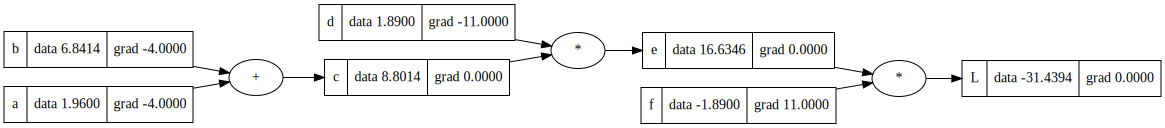

In [28]:
# we now see the gradients being stored
draw_dot(L)

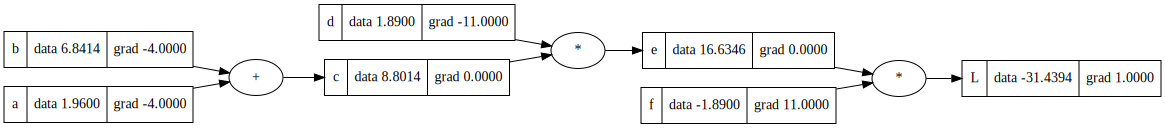

In [29]:
L.grad = 1
draw_dot(L)

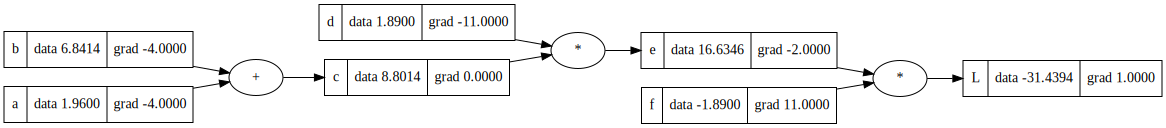

In [30]:
f.grad = 11
e.grad = -2
draw_dot(L)

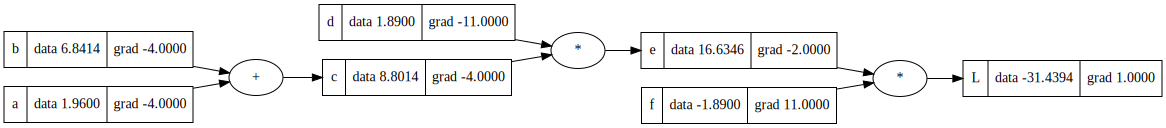

In [31]:
d.grad = -11
c.grad = -4
draw_dot(L)

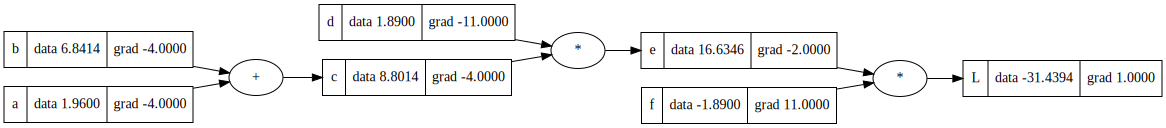

In [32]:
# We now have all the gradients, done by hand
a.grad = -4
b.grad = -4
draw_dot(L)

In [20]:
# You can now run an optimization step by adding a portion of the gradient to the data(value) of the leaves 
a.data += 0.01 * a.grad 
b.data += 0.01 * b.grad 
d.data += 0.01 * d.grad 
f.data += 0.01 * f.grad 

c = a + b
c.label = 'c'
e = d * c
e.label = 'e'
L = e * f
L.label = 'L'

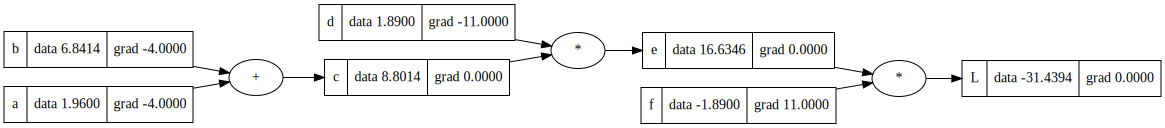

In [21]:
draw_dot(L)

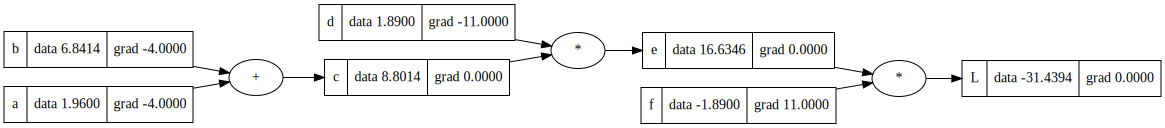

In [22]:
# As you see the data for L is getting larger (less negative), 
draw_dot(L)

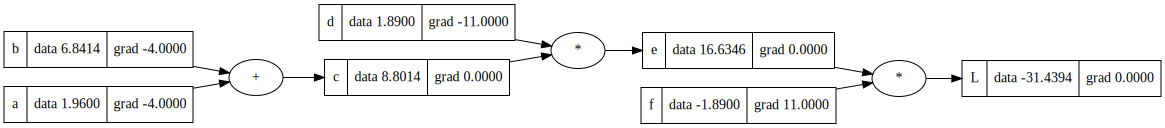

In [23]:
draw_dot(L)

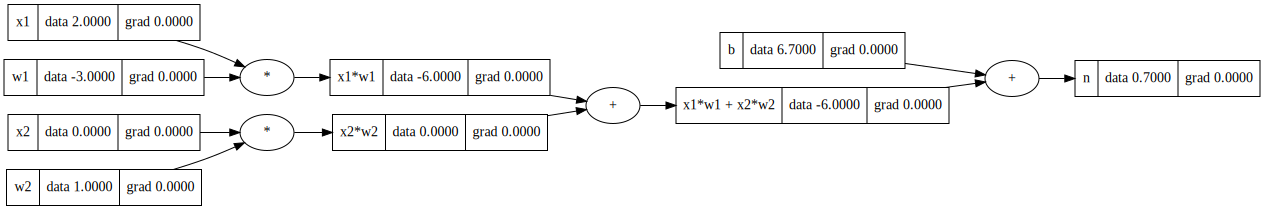

In [24]:
# Neural Net example
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

w1 = Value(-3, label='w1')
w2 = Value(1.0, label='w2')

b = Value(6.7, label='b')

x1w1 = x1*w1
x1w1.label = 'x1*w1'

x2w2 = x2*w2
x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = 'x1*w1 + x2*w2'

n = x1w1x2w2 + b
n.label = 'n'
draw_dot(n)

# Implementing Tanh function for gradient descent

In [25]:
import math 
class Value:
  def __init__(self, data, children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._prev = set(children)
    self._op = _op
    self.label = label

  # this lets us print out a nicer expression than the default one in python 
  def __repr__(self):
    return f"Value(data={self.data})"

  # this is called whenever our class is added somewhere
  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')
    return out
  
  # this is called whenever class object is multipled
  def __mul__(self, other):
    out = Value(self.data*other.data, (self, other), "*")
    return out
  
  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    return out

In [26]:
# Neural Net example
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

w1 = Value(-3, label='w1')
w2 = Value(1.0, label='w2')

b = Value(6.88137, label='b')

x1w1 = x1*w1
x1w1.label = 'x1*w1'

x2w2 = x2*w2
x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = 'x1*w1 + x2*w2'

n = x1w1x2w2 + b
n.label = 'n'
output = n.tanh()
output.label = 'output'

In [33]:
# We will now back propagate with our new tanh function 
output.grad = 1.0

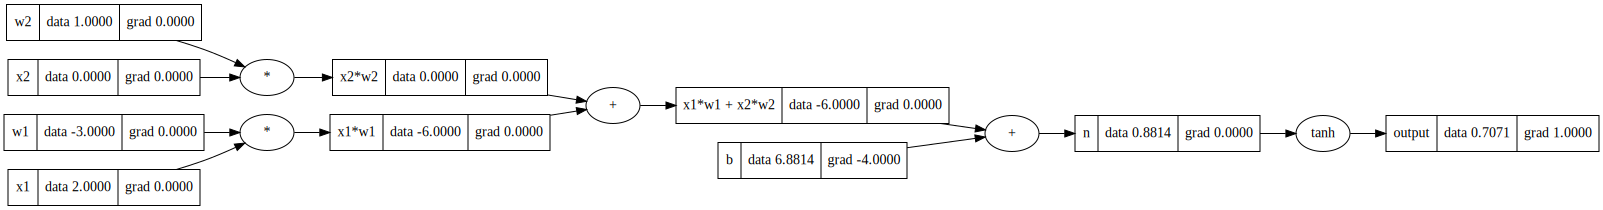

In [34]:
draw_dot(output)

In [39]:
# Calculating n.grad (equals dO/dn)

# output = tanh(n)
# do/dn = 1 - tanh(n) ** 2

tan = output.data
n.grad = 1 - tan**2

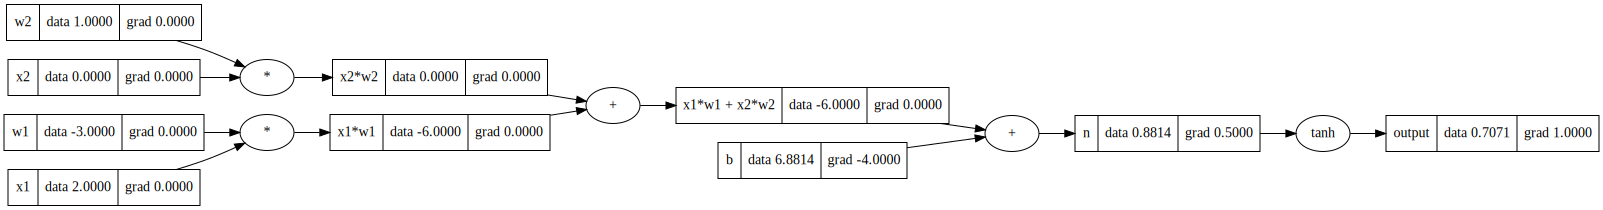

In [38]:
draw_dot(output)

In [40]:
# Gradients for x1*w1 + x2*w2, and b

# gradient equals 0.5 (n) since addtion operation derivative is 1 so it flows from n 
x1w1x2w2.grad = 0.5
b.grad = 0.5

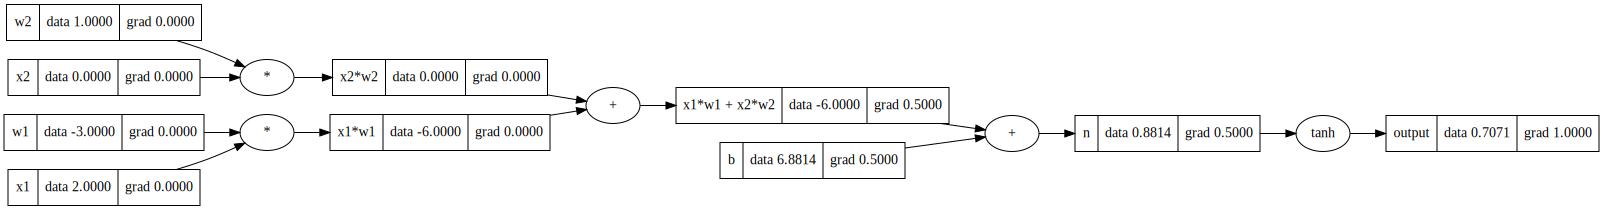

In [41]:
draw_dot(output)

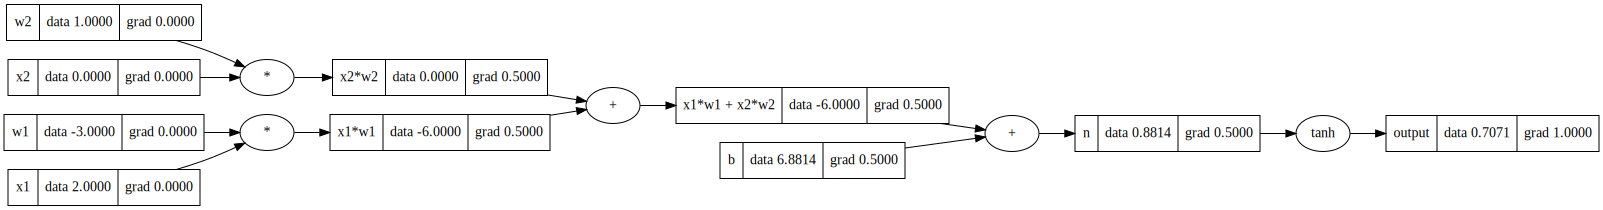

In [43]:
# for x1*w1, x2*w2 indiviudally there is also addition so the gradient just flows from the previous one
x1w1.grad = 0.5
x2w2.grad = 0.5
draw_dot(output)

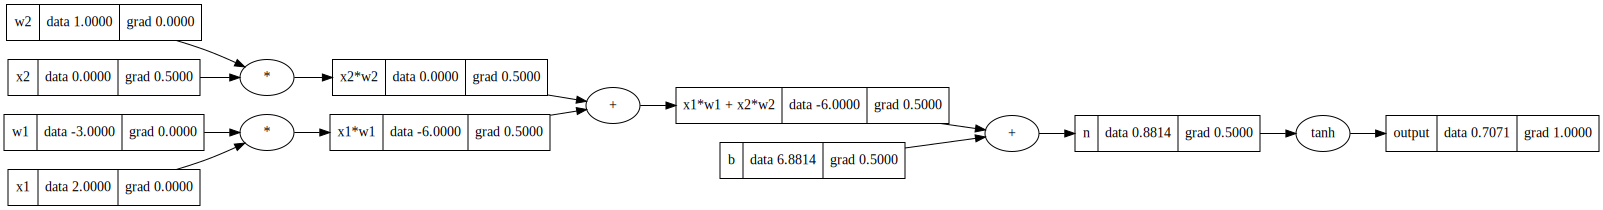

In [44]:
# Gradient for x2, w2
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad
draw_dot(output)

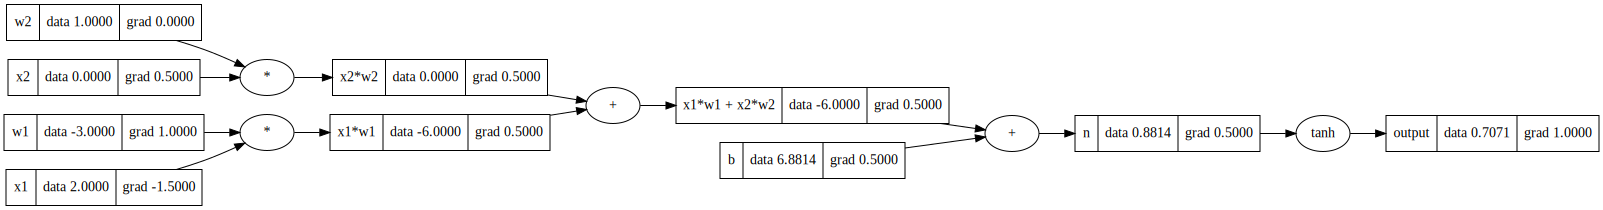

In [45]:
# Gradient for x1, w1
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad
draw_dot(output)

# We will now add backpropagation functionally to the Value class

In [68]:
class Value:
  def __init__(self, data, children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    # by default, the backward function doesnt do anything
    self._backward = lambda: None
    self._prev = set(children)
    self._op = _op
    self.label = label

  # this lets us print out a nicer expression than the default one in python 
  def __repr__(self):
    return f"Value(data={self.data})"

  
  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')

    # we want to take out.grad and propagate it to self.grad and other.grad
    def _backward():
      # since this is addition the local derivative is 1.0
      self.grad = 1.0 * out.grad 
      other.grad = 1.0 * out.grad 

    out._backward = _backward
    return out
  
  def __mul__(self, other):
    out = Value(self.data*other.data, (self, other), "*")

    # we now add the same functionally for multiplication, this will allow us to backpropagate
    def _backward():
      # since this is multi the local derivative is 'other' elements value/data
      self.grad =  other.data * out.grad 
      other.grad =  self.data * out.grad 

    out._backward = _backward
    
    return out
  
  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')

    # this chains the out.grad to self.grad 
    def _backward():
      # local derivative of tanh is 1 - (tanh) ** 2
      self.grad =  (1 - t ** 2) * out.grad 

    out._backward = _backward
    return out

In [69]:
# Neural Net example
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

w1 = Value(-3, label='w1')
w2 = Value(1.0, label='w2')

b = Value(6.88137, label='b')

x1w1 = x1*w1
x1w1.label = 'x1*w1'

x2w2 = x2*w2
x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = 'x1*w1 + x2*w2'

n = x1w1x2w2 + b
n.label = 'n'
output = n.tanh()
output.label = 'output'

# We can now call our backward function to back propagate for us

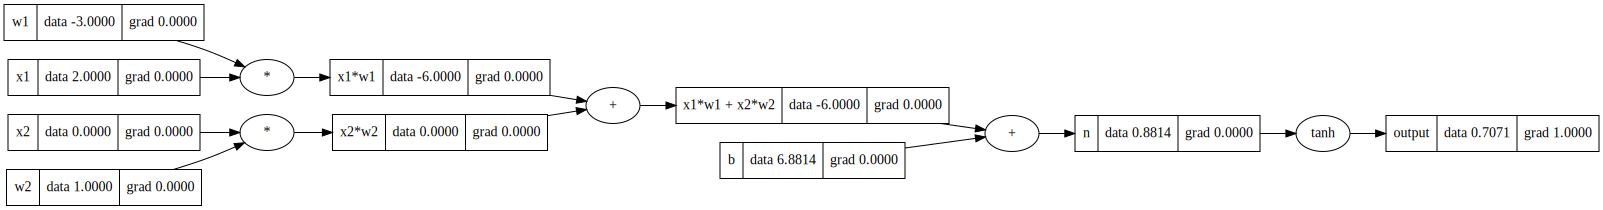

In [48]:
# Make sure to assign the grad since it will be 0 by default 
output.grad = 1
draw_dot(output)

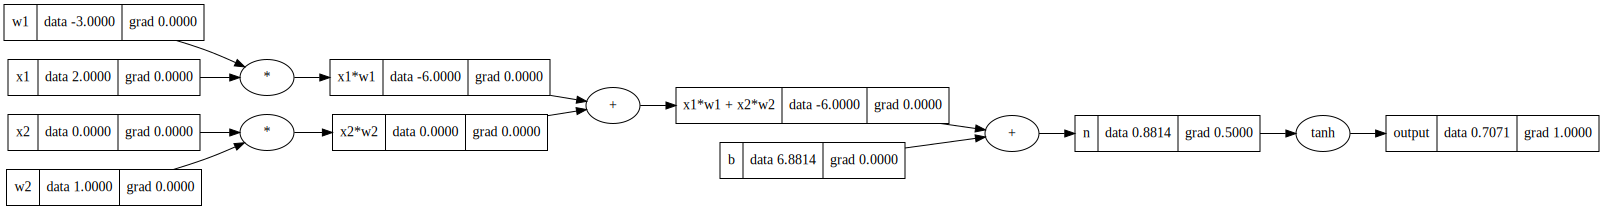

In [49]:
# This should propagate backward (one step) for us 
output._backward()
draw_dot(output)
# in this example this gave us the grad for n 

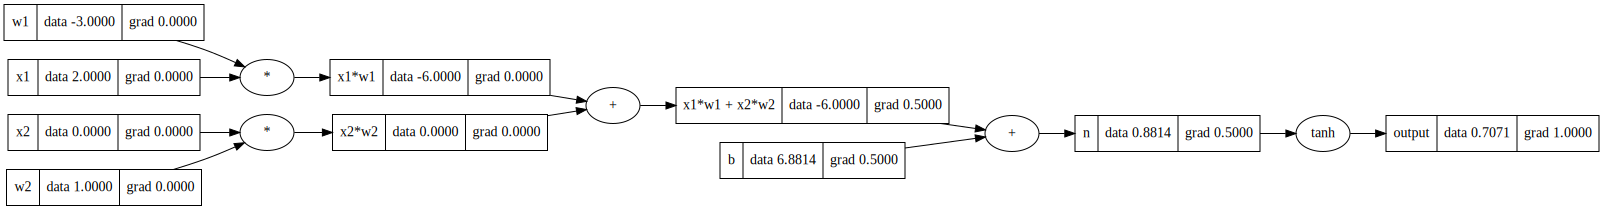

In [50]:
# To continue we need to call the backward on the next element which was n 
n._backward()
draw_dot(output)

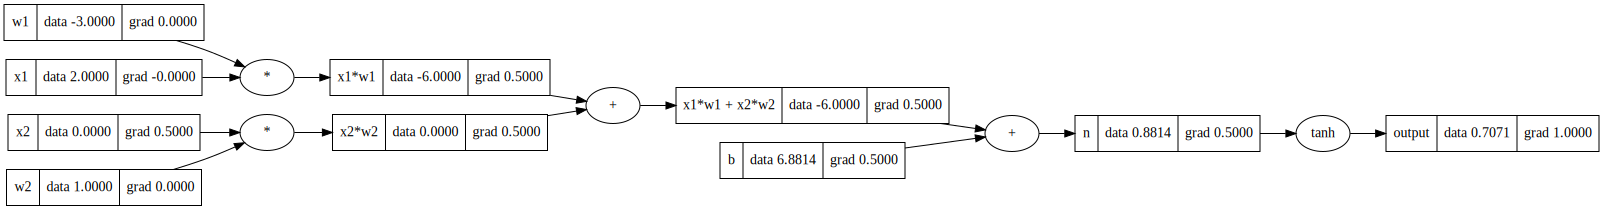

In [55]:
x1w1x2w2._backward()
draw_dot(output)

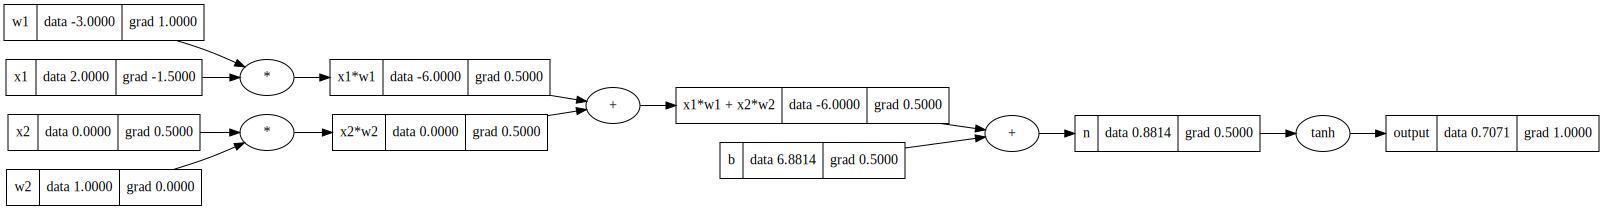

In [56]:
x1w1._backward()
x2w2._backward()
draw_dot(output)

# ayyyy we got all our gradients 

Important: we need to back propagate through all succeeding nodes before calling `_backward()`

One way to account for this: `topological sort`


In [73]:
# Implementing Topological Sort
topo = []
visited = set()
def build_topo(v):
  if v not in visited:
    visited.add(v)
    for child in v._prev:
      build_topo(child)
    topo.append(v)

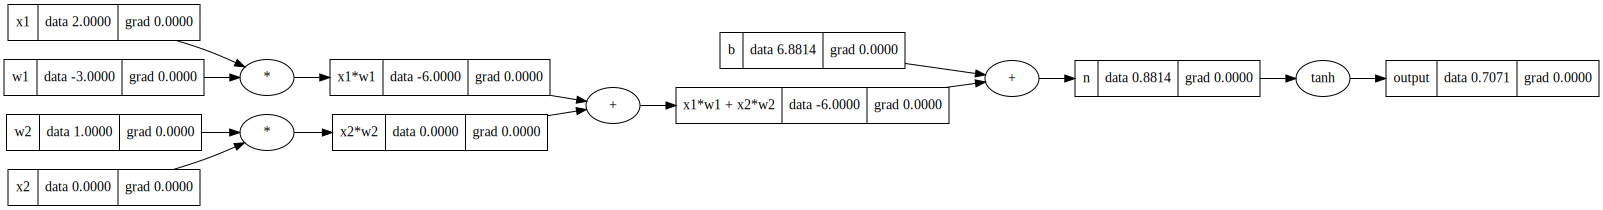

In [74]:
# Reset out gradients
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

w1 = Value(-3, label='w1')
w2 = Value(1.0, label='w2')

b = Value(6.88137, label='b')

x1w1 = x1*w1
x1w1.label = 'x1*w1'

x2w2 = x2*w2
x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = 'x1*w1 + x2*w2'

n = x1w1x2w2 + b
n.label = 'n'
output = n.tanh()
output.label = 'output'
draw_dot(output)

In [75]:
# starts at the output and goes through all the children, lays them out from left to right
build_topo(output)

topo

[Value(data=2.0),
 Value(data=-3),
 Value(data=-6.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=0.0),
 Value(data=-6.0),
 Value(data=6.88137),
 Value(data=0.8813700000000004),
 Value(data=0.7071049876722272)]

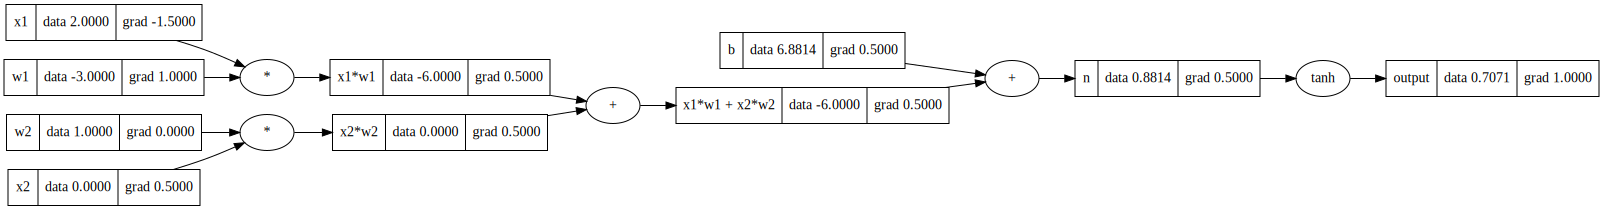

In [76]:
# set our output grad
output.grad = 1.0

# loop through out topo array in reverse since we want to start at the end
for node in reversed(topo):
  node._backward()
draw_dot(output)

# We now add support to backpropagate to our Value class

In [94]:
class Value:
  def __init__(self, data, children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    # by default, the backward function doesnt do anything
    self._backward = lambda: None
    self._prev = set(children)
    self._op = _op
    self.label = label

  # this lets us print out a nicer expression than the default one in python 
  def __repr__(self):
    return f"Value(data={self.data})"

  
  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')
    def _backward():
      self.grad = 1.0 * out.grad 
      other.grad = 1.0 * out.grad 
    out._backward = _backward
    return out
  
  def __mul__(self, other):
    out = Value(self.data*other.data, (self, other), "*")
    def _backward():
      self.grad =  other.data * out.grad 
      other.grad =  self.data * out.grad 
    out._backward = _backward
    return out
  
  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    def _backward():
      self.grad =  (1 - t ** 2) * out.grad 
    out._backward = _backward
    return out

  # add functionally for back propagation on all the whole network 
  def backward(self):
    # we peform topo sort to order the nodes
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    # call the function on self to build the array
    build_topo(self)

    # set the grad of the output and then backward pass through all the preceeding nodes  
    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

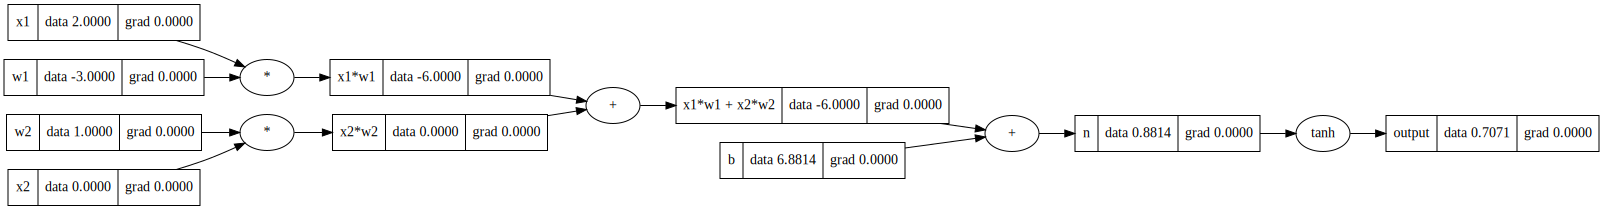

In [95]:
# Reset out gradients
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

w1 = Value(-3, label='w1')
w2 = Value(1.0, label='w2')

b = Value(6.88137, label='b')

x1w1 = x1*w1
x1w1.label = 'x1*w1'

x2w2 = x2*w2
x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = 'x1*w1 + x2*w2'

n = x1w1x2w2 + b
n.label = 'n'
output = n.tanh()
output.label = 'output'
draw_dot(output)

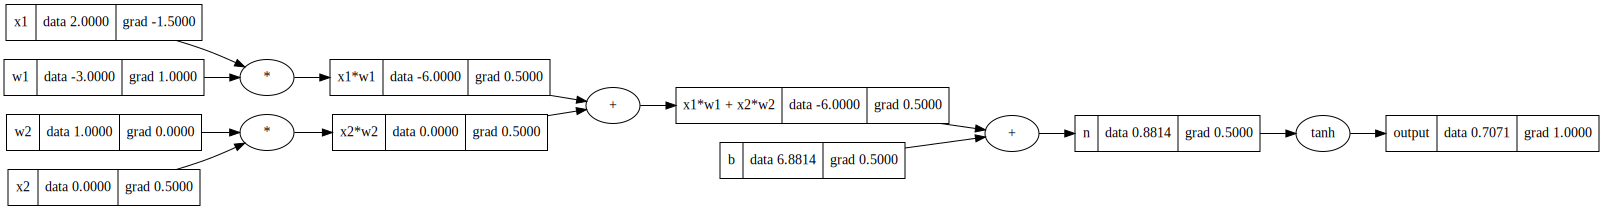

In [97]:
# Now with one line we can compute the gradients of each node
# Voila
output.backward()
draw_dot(output)

In [98]:
# BUGFIX: We need to apply += when calculating our gradients because they could potentially over-write each other on when _backward() is called

class Value:
  def __init__(self, data, children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(children)
    self._op = _op
    self.label = label

  # this lets us print out a nicer expression than the default one in python 
  def __repr__(self):
    return f"Value(data={self.data})"

  
  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')
    def _backward():
      self.grad += 1.0 * out.grad 
      other.grad += 1.0 * out.grad 
    out._backward = _backward
    return out
  
  def __mul__(self, other):
    out = Value(self.data*other.data, (self, other), "*")
    def _backward():
      self.grad += other.data * out.grad 
      other.grad += self.data * out.grad 
    out._backward = _backward
    return out
  
  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    def _backward():
      self.grad += (1 - t ** 2) * out.grad 
    out._backward = _backward
    return out

  def backward(self):
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

# Adding functionally to Value class: now you can directly add an integer

- Float Addition
- Float Multiplication
- Float Subtraction
- Exponentiation (e ** x)
- Division (using exponents) 

In [172]:
class Value:
  def __init__(self, data, children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(children)
    self._op = _op
    self.label = label

  # this lets us print out a nicer expression than the default one in python 
  def __repr__(self):
    return f"Value(data={self.data})"

  # this accounts for when you use the sum() on a Value type
  def __radd__(self, other):
    if other == 0:
        return self
    else:
        return self.__add__(other)

  def __add__(self, other):
    # simply line of code, lets you add an int directly 
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), '+')
    def _backward():
      self.grad += 1.0 * out.grad 
      other.grad += 1.0 * out.grad 
    out._backward = _backward
    return out
  
  def __neg__(self):
    return self * -1
  
  # simple way to implement subtraction, addition of a negation 
  def __sub__(self, other):
    return self + (-other)

  # This is needed in case you multiply a number first (5 * a), python will throw error otherwise
  def __rmul__(self, other):
    return self * other

  # this gives us power to divide, need to implement pow func
  def __truediv__(self, other):
    return self * other**-1

  def __pow__(self, other):
    assert isinstance(other, (int, float)), 'only supports ints and floats'
    out = Value(self.data**other, (self,), f'**{other}')

    # local derivative :)
    def _backward():
      self.grad += (other * (self.data ** (other - 1))) * out.grad 
    out._backward = _backward
    return out

  def __mul__(self, other):
    # simply line of code, lets you add an int directly 
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data*other.data, (self, other), '*')
    def _backward():
      self.grad += other.data * out.grad 
      other.grad += self.data * out.grad 
    out._backward = _backward
    return out
  
  def exp(self):
    x = self.data
    out = Value(math.exp(x), (self,), 'exp')

    # take local derivative
    def _backward():
      # out.data = math.exp(x)
      self.grad += out.data * out.grad 
    out._backward = _backward
    return out

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    def _backward():
      self.grad += (1 - t ** 2) * out.grad 
    out._backward = _backward
    return out

  def backward(self):
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad = 1.0
    for node in reversed(topo):
      node._backward()

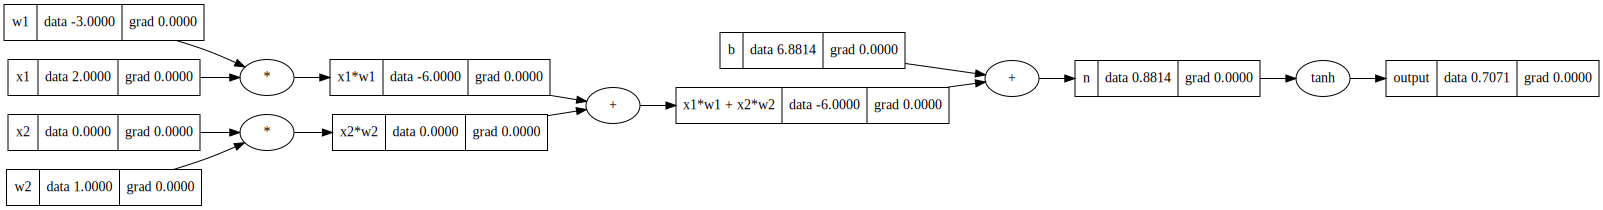

In [173]:
# Reset out gradients
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

w1 = Value(-3, label='w1')
w2 = Value(1.0, label='w2')

b = Value(6.88137, label='b')

x1w1 = x1*w1
x1w1.label = 'x1*w1'

x2w2 = x2*w2
x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = 'x1*w1 + x2*w2'

n = x1w1x2w2 + b
n.label = 'n'
output = n.tanh()
output.label = 'output'
draw_dot(output)

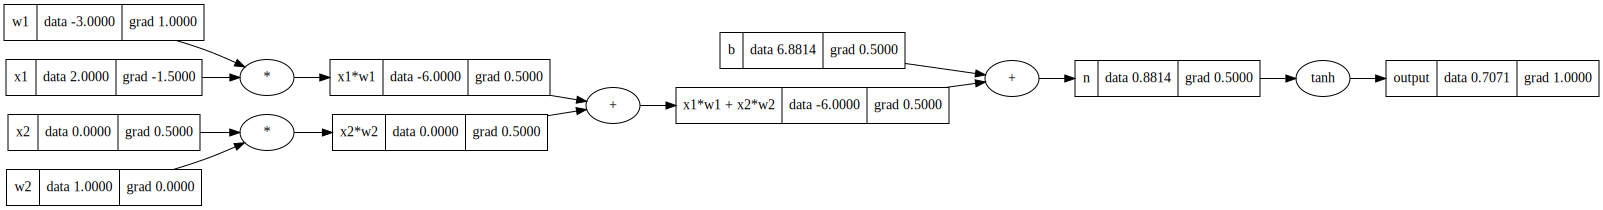

In [174]:
output.grad = 1.0
output.backward()
draw_dot(output)

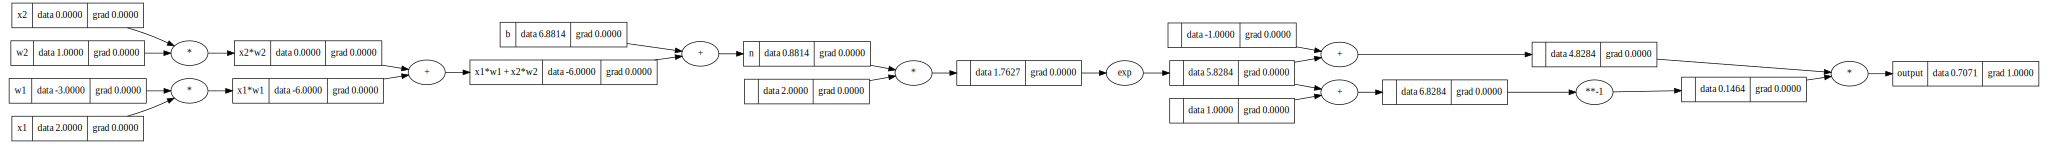

In [175]:
# We can now change how we implement our output thanks to our new functionality
# Reset out gradients
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

w1 = Value(-3, label='w1')
w2 = Value(1.0, label='w2')

b = Value(6.88137, label='b')

x1w1 = x1*w1
x1w1.label = 'x1*w1'

x2w2 = x2*w2
x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = 'x1*w1 + x2*w2'

n = x1w1x2w2 + b
n.label = 'n'

# calculating o
e = (2*n).exp()
output = (e - 1)/(e + 1)
output.label = 'output'
output.grad = 1
draw_dot(output)

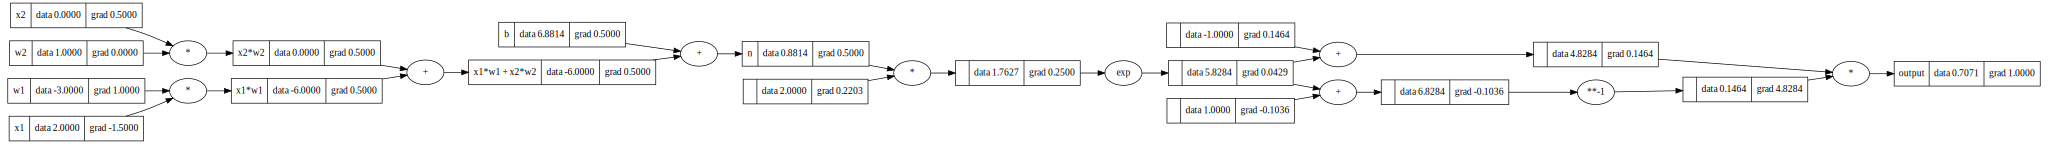

In [176]:
# These gradients are the same as previously when we were using tanh 
output.backward()
draw_dot(output)

# How to do what we just did in PyTorch

Micrograd is a scalar value engine

In PyTorch, it is all based on tensors (n-dimensional arrays of scalars 

In [177]:
import torch

# casting it to double, python by default is using double precision for its floating point numbers 
x1 = torch.Tensor([2.0]).double()     
# because these are leaf nodes, by default pytorch will assume they do not require gradients             
x1.requires_grad = True

x2 = torch.Tensor([0.0]).double()                
x2.requires_grad = True

w1 = torch.Tensor([-3.0]).double()               
w1.requires_grad = True

w2 = torch.Tensor([1.0]).double()                
w2.requires_grad = True

b = torch.Tensor([6.8813735870195432]).double()  
b.requires_grad = True

n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

# In PyTorch, similar to our implementation each node has a data and grad attribute. Need to call .item() to get just the element (wihthout tensor)

print(o.data.item())
print(o.item())
o.backward()

# This matches up with our previous calculations 
print('---')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.7071066904050358
0.7071066904050358
---
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [178]:
# Neuron Object

import random
class Neuron:
  def __init__(self, num_inputs):
    self.w = [Value(random.uniform(-1, 1)) for _ in range(num_inputs)]
    self.b = Value(random.uniform(-1, 1))

    # need to multiply all elements of w with all of x (pairwise)
  def __call__(self, x):
    # w * x + b 
    # zip takes two iterators and creates a new iterator that iterates over the tuple of corressponding entries
    
    act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
    output = act.tanh()
    return output
  
x = [2.0, 3.0]
n = Neuron(2)
n(x)

Value(data=-0.9813614942826864)

In [179]:
class Layer:
  def __init__(self, num_inputs, num_outputs_in_layer):
    self.neurons = [Neuron(num_inputs) for _ in range(num_outputs_in_layer)]
  
  def __call__(self, x):
    outputs = [n(x) for n in self.neurons]
    return outputs[0] if len(outputs) == 1 else outputs

# This layer has two inputs and three outputs
x = [2.0, 3.0]
n = Layer(2, 3)
n(x)

[Value(data=0.998437219790539),
 Value(data=0.9080529581714838),
 Value(data=0.6393618802003612)]

In [180]:
class MLP:
  # num_outputs is a list of the num of neurons we want in each respective layer
  def __init__(self, num_inputs, num_outputs):
    sz = [num_inputs] + num_outputs
    self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(num_outputs))]

  def __call__(self, x):
    for layer in self.layers:
      x = layer(x)
    return x

# We will recreate this 
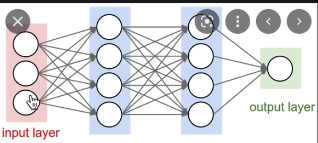

In [181]:
# x is out input neurons (3 neurons)
x = [-3, 5, 2]

n = MLP(3, [4, 4, 1])
# this is a forward pass of the MLP above
n(x)

Value(data=-0.79450834467174)

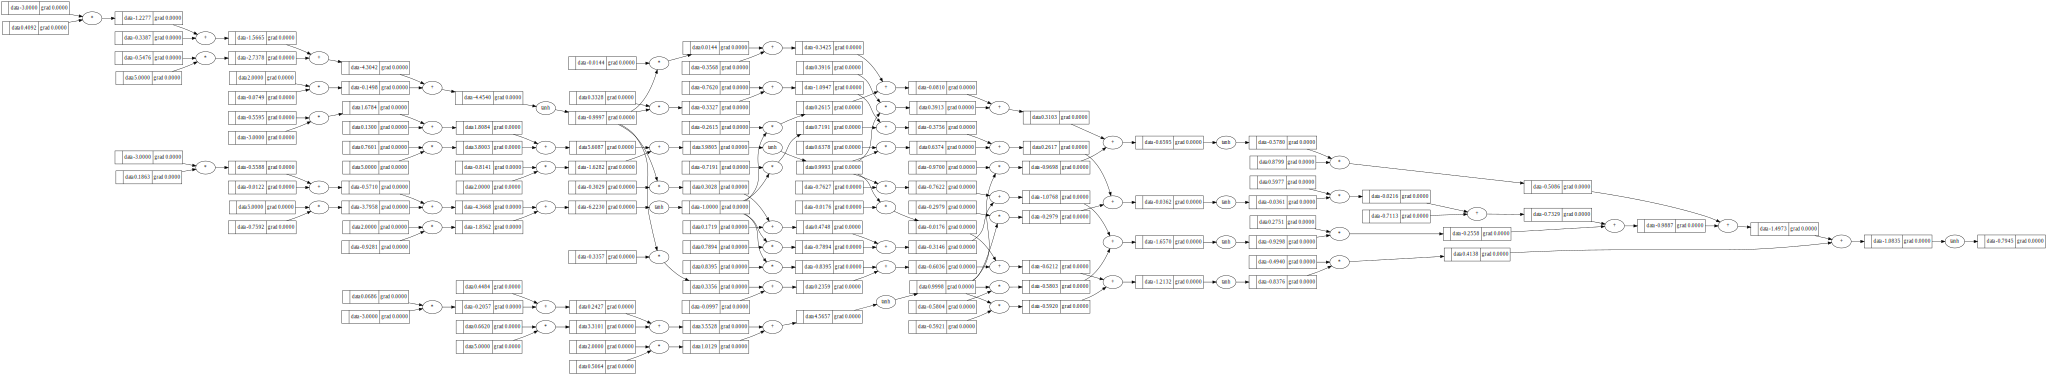

In [182]:
draw_dot(n(x))

In [183]:
# Example dataset
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]

# these are our labels, this is what we want our ypred to be
ys = [1.0, -1.0, -1.0, 1.0]
ypred = [n(x) for x in xs]
# remember we want ypred to be similar to our ys, so move respective index closer to its corressponding ys value 
ypred

[Value(data=-0.8328925097204095),
 Value(data=-0.9472018215565123),
 Value(data=-0.9121859310891242),
 Value(data=-0.9362268535637428)]

# The trick to get our ypreds to be closer to our ys (labels) it to use the `loss`

##We want to `minimize` the lost
this is the reason we back propagate and calculate the gradients (derivatives) to find which changes will have the biggest impact on the loss

In [184]:
# calc the loss
# actual value of y (yact) and ouput we got with ypred (yout)
# we take the difference and square them 
[(yout - yact)** 2 for yact, yout in zip(ys, ypred)]

[Value(data=3.359494952189182),
 Value(data=0.0027876476469503655),
 Value(data=0.0077113106986840515),
 Value(data=3.7489744284613513)]

In [185]:
# total loss will be sum of all individual loss
loss = sum((yout - yact)** 2 for yact, yout in zip(ys, ypred))
loss

Value(data=7.118968338996168)

# We want to minize this loss as much as possible

The closer we are to zero, means the closer we are to ys and ypred being equal 

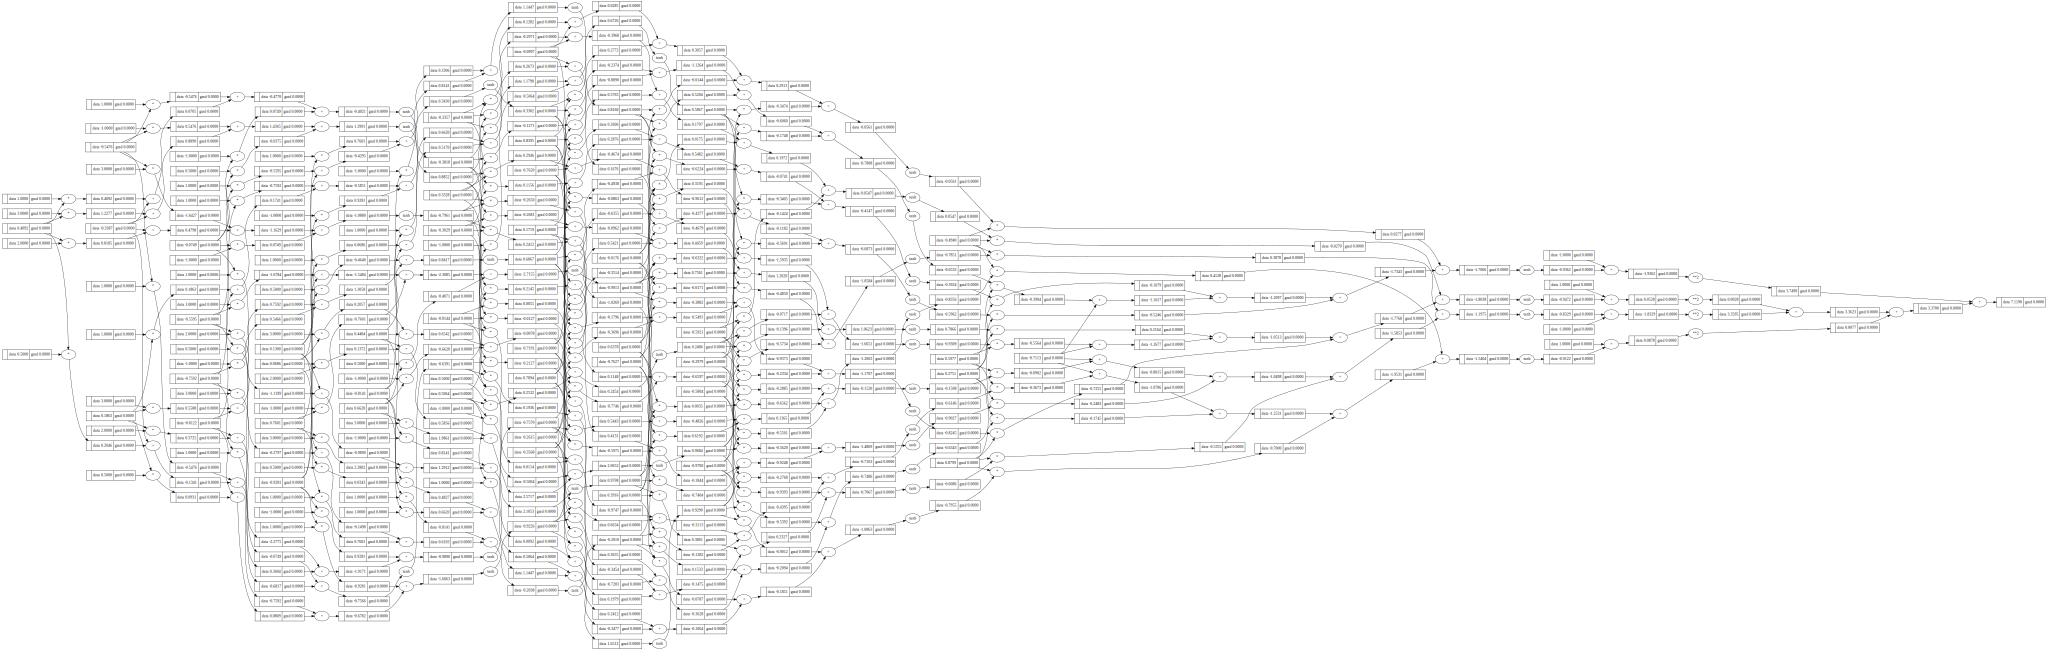

In [187]:
draw_dot(loss)

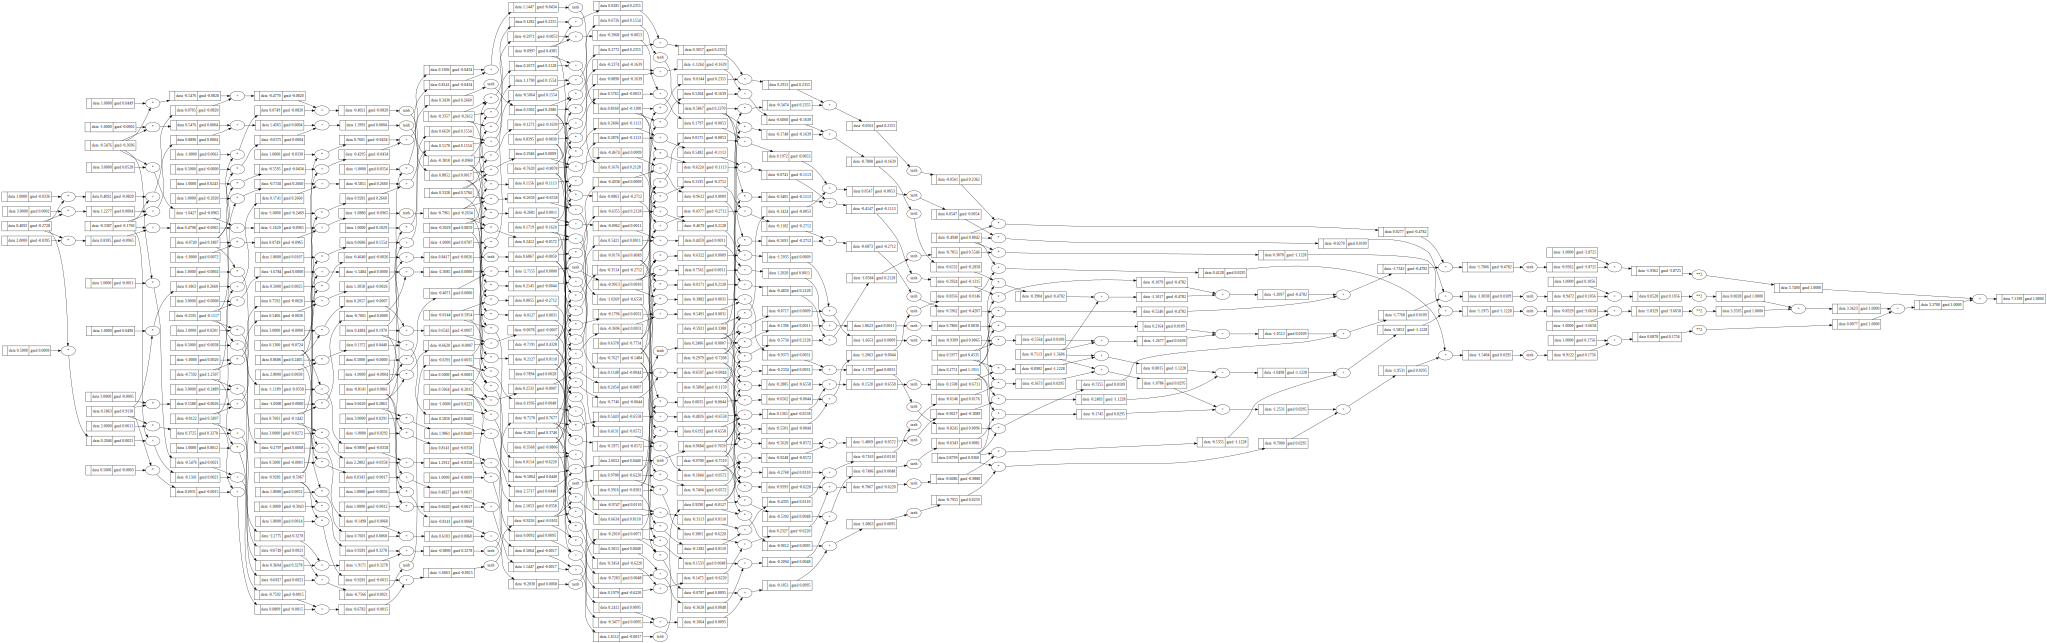

In [188]:
loss.backward()
draw_dot(loss)

In [192]:
# We now add the params of NN in neurons, layers 
class Neuron:
  def __init__(self, num_inputs):
    self.w = [Value(random.uniform(-1, 1)) for _ in range(num_inputs)]
    self.b = Value(random.uniform(-1, 1))

  def __call__(self, x):
    act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
    output = act.tanh()
    return output

  def parameters(self):
    return self.w + [self.b]

class Layer:
  def __init__(self, num_inputs, num_outputs_in_layer):
    self.neurons = [Neuron(num_inputs) for _ in range(num_outputs_in_layer)]
  
  def __call__(self, x):
    outputs = [n(x) for n in self.neurons]
    return outputs[0] if len(outputs) == 1 else outputs

  def parameters(self):
    # this is simple version of the code below
    # return [p for neuron in self.neurons for p in neuron.parameters()]
    params = []
    for neuron in self.neurons:
      ps = neuron.parameters()
      params.extend(ps)
    return params


class MLP:
  # num_outputs is a list of the num of neurons we want in each respective layer
  def __init__(self, num_inputs, num_outputs):
    sz = [num_inputs] + num_outputs
    self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(num_outputs))]

  def __call__(self, x):
    for layer in self.layers:
      x = layer(x)
    return x

  def parameters(self):
    return [p for layer in self.layers for p in layer.parameters()]

In [193]:
# we reintialize network
x = [-3, 5, 2]

n = MLP(3, [4, 4, 1])
n(x)

Value(data=0.9774430220706739)

In [195]:
# these are now all of our params, 41 total
n.parameters(), len(n.parameters())

([Value(data=-0.1895433496604395),
  Value(data=0.8674348850115858),
  Value(data=0.3192321459184597),
  Value(data=0.8867992945048415),
  Value(data=-0.6664608691249179),
  Value(data=-0.16974152065162018),
  Value(data=-0.34811150195063556),
  Value(data=0.2132288985407278),
  Value(data=0.2894109348107943),
  Value(data=0.04776150590526673),
  Value(data=0.05685102605078041),
  Value(data=-0.7604452109623059),
  Value(data=0.7294597070717206),
  Value(data=0.3785376034422858),
  Value(data=0.9774911891182598),
  Value(data=0.9033781712105386),
  Value(data=0.10561487369606004),
  Value(data=0.1569971943550048),
  Value(data=0.7117985738231853),
  Value(data=-0.6816302077099834),
  Value(data=0.120097238837088),
  Value(data=-0.7349463470971629),
  Value(data=-0.07471647547059468),
  Value(data=-0.3768993792474107),
  Value(data=0.38248566695669184),
  Value(data=-0.004685088040804697),
  Value(data=-0.17502054674786582),
  Value(data=-0.9826173988664144),
  Value(data=0.921601426824

In [196]:
# Example dataset
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]

# these are our labels, this is what we want our ypred to be
ys = [1.0, -1.0, -1.0, 1.0]
ypred = [n(x) for x in xs]
# remember we want ypred to be similar to our ys, so move respective index closer to its corressponding ys value 
ypred

[Value(data=0.8264195480870958),
 Value(data=0.6246228851605732),
 Value(data=0.8672615292185253),
 Value(data=0.8757374495037752)]

In [197]:
loss = sum((yout - yact)** 2 for yact, yout in zip(ys, ypred))
loss

Value(data=6.171636492229086)

In [198]:
loss.backward()

In [199]:
# we can view a single neurons gradient 
n.layers[0].neurons[0].w[0].grad

2.1653942168963574

In [201]:
# Update Pass
# we want to perform update on our params 
for p in n.parameters():
  # the negative allows us to minize the loss  
  p.data += -0.01 * p.grad

In [202]:
# our loss now gets closer to 0. from 6.17 to 5.7
ypred = [n(x) for x in xs]
loss = sum((yout - yact)** 2 for yact, yout in zip(ys, ypred))
loss

Value(data=5.7600526378685855)

In [203]:
loss.backward()

In [204]:
for p in n.parameters():
  # the negative allows us to minize the loss  
  p.data += -0.01 * p.grad

In [205]:
ypred = [n(x) for x in xs]
loss = sum((yout - yact)** 2 for yact, yout in zip(ys, ypred))
loss

Value(data=4.788246283844674)

# Forward -> Backward -> Update

## Tricky part of gradient descent calculating loss is we are working in m-dimentional space so visiualizing whats happening can be tricky 


# We also forgot something important to zero grad after our backward pass

In [209]:
x = [-3, 5, 2]

n = MLP(3, [4, 4, 1])
n(x)

Value(data=-0.11796388818180796)

In [210]:
# Example of Training Our Neural Network
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0]

for k in range(20):
  # forward pass, we pass through NN and calculate the total loss
  ypred = [n(x) for x in xs]
  loss = sum((yout - yact)** 2 for yact, yout in zip(ys, ypred))
  
  # backward pass, we back prop through our network taking derivatives along the way
  for p in n.parameters():
    p.grad = 0.0
  loss.backward()

  # update, we update our weights to minize the loss 
  for p in n.parameters():
    p.data += -0.05 * p.grad

  print(k, loss.data)

0 3.1916757346704214
1 1.9387723066547258
2 1.1105769142299868
3 0.6225508920770674
4 0.389930833819383
5 0.27361524706546053
6 0.2075024421906178
7 0.165798257671298
8 0.13740269510132003
9 0.11695029615537539
10 0.10157876747721475
11 0.08963693287021543
12 0.08011120745626385
13 0.0723474298537972
14 0.06590570788017515
15 0.0604799439129385
16 0.05585090022838314
17 0.05185762636966805
18 0.04837941475958125
19 0.045324037899778645


In [211]:
ypred

[Value(data=0.9354877940511503),
 Value(data=-0.9274835478341443),
 Value(data=-0.8467313510842396),
 Value(data=0.8885895040482882)]